In [2]:
import matplotlib.pyplot as plt
import scanpy as sc
from utils import observe_condition, observe_cell_types

adata = sc.read_h5ad("../nCoV_dataset_full.h5ad")

## Data investigation

In [3]:
print(adata.obs.keys())

Index(['orig.ident', 'nCount_RNA', 'nFeature_RNA', 'batch', 'percent.mt',
       'seurat_clusters', 'cell_type', 'integrated_snn_res.0.8', 'Stage'],
      dtype='object')


In [4]:
observe_condition(adata)

In [5]:
print(adata.obs.keys())

Index(['orig.ident', 'nCount_RNA', 'nFeature_RNA', 'batch', 'percent.mt',
       'seurat_clusters', 'cell_type', 'integrated_snn_res.0.8', 'Stage',
       'sample_name', 'condition'],
      dtype='object')


## Perform and Plot PCA

In [3]:
print("Observation keys before observing condition and cell types")
print(adata.obs.keys())

observe_condition(adata)
observe_cell_types(adata)

print("Observation keys after observing condition and cell types")
print(adata.obs.keys())

Observation keys before observing condition and cell types
Index(['orig.ident', 'nCount_RNA', 'nFeature_RNA', 'batch', 'percent.mt',
       'seurat_clusters', 'cell_type', 'integrated_snn_res.0.8', 'Stage'],
      dtype='object')
Observation keys after observing condition and cell types
Index(['orig.ident', 'nCount_RNA', 'nFeature_RNA', 'batch', 'percent.mt',
       'seurat_clusters', 'cell_type', 'integrated_snn_res.0.8', 'Stage',
       'sample_name', 'condition', 'cell_type_name'],
      dtype='object')


In [4]:
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

sc.tl.pca(adata, svd_solver='arpack')

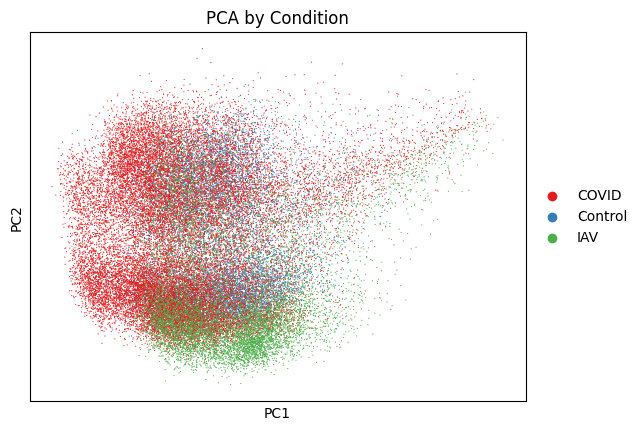

In [5]:
palette = ["#E41A1C", "#377EB8", "#4DAF4A"]
sc.pl.pca(adata, color="condition", title="PCA by Condition", palette=palette)

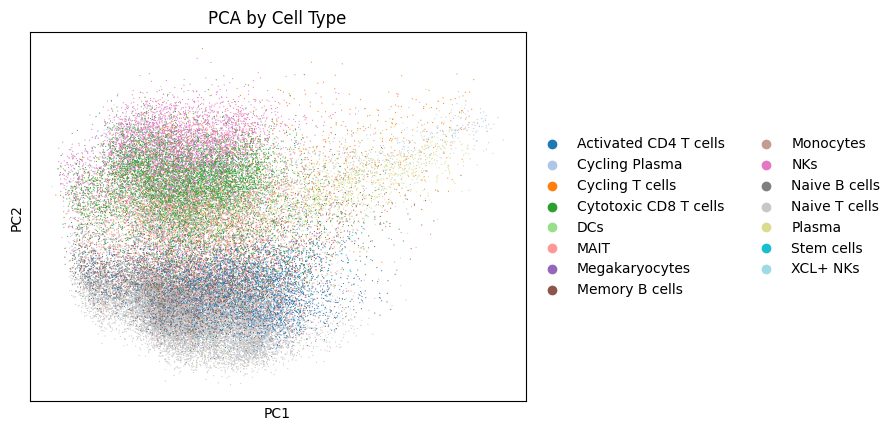

In [6]:
sc.pl.pca(adata, color="cell_type_name", title="PCA by Cell Type", palette="tab20")